<a href="https://colab.research.google.com/github/tuliopradoc/analise-dados-enem-2020/blob/main/Analise_microdadosEnem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise das médias das notas nas disciplinas do ENEM 2020 de acordo com o tipo de escola do ensino médio declarado pelos candidatos**



Link para download do dataset: [https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem](https://)

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [ ]:
sns.set()

mdEnem = pd.read_csv("/content/drive/MyDrive/Datasets/ENEM -2020/microdados_enem_2020.zip (Unzipped Files)/DADOS/MICRODADOS_ENEM_2020.csv",
                             sep = ";", encoding = "ISO-8859-1")

In [ ]:
NotasEnem = mdEnem.filter(items = ['SG_UF_PROVA', 'TP_ESCOLA','NU_NOTA_CN', 
                                          'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT', 'NU_NOTA_REDACAO'])

In [ ]:
NotasEnem.head()

,SG_UF_PROVA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,PA,1,NaN,NaN,NaN,NaN,NaN
1,RN,1,604.1,661.7,595.3,711.3,580.0
2,BA,2,NaN,NaN,NaN,NaN,NaN
3,SP,2,620.8,675.0,624.2,759.4,760.0
4,MG,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Dicionário para os tipos de escolas do ensino médio declarados pelos cadidatos

dic_tp_escola = {
'1' :	'Não Respondeu',
'2' :	'Pública',
'3' :	'Privada',
'4' :	'Exterior',
}

# Criando a coluna TIPO_ESCOLA

NotasEnem['TIPO_ESCOLA'] = [dic_tp_escola[str(x)] for x in NotasEnem.TP_ESCOLA]

In [ ]:
NotasEnem['TIPO_ESCOLA'].value_counts()

# Não há cadidatos que declararam ter feito ensino médio em escola estrangeira

Não Respondeu    4387282
Pública          1194496
Privada           201331
Name: TIPO_ESCOLA, dtype: int64

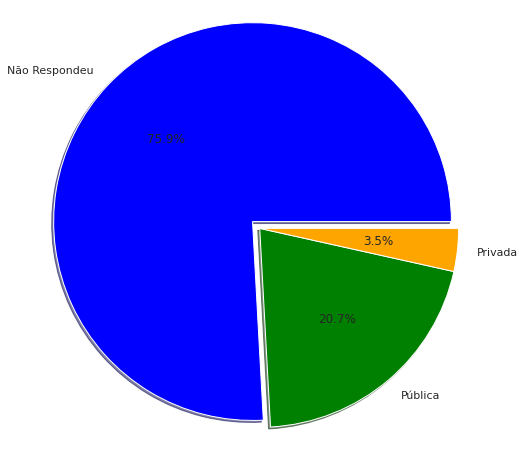

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))

ax.pie(NotasEnem['TIPO_ESCOLA'].value_counts(), labels = ['Não Respondeu','Pública','Privada',],
        autopct='%1.1f%%', radius=2, shadow=True, colors = ['blue', 'green', 'orange'], explode = (0.1,0,0));
ax.axis('equal');

### **Média nacional em cada disciplina segundo o tipo de escola:**

In [ ]:
Medias_Nacional = NotasEnem.filter(items = ['TIPO_ESCOLA', 'NU_NOTA_REDACAO', 'NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_MT', 'NU_NOTA_CN'])\
                           .groupby(['TIPO_ESCOLA']).mean()

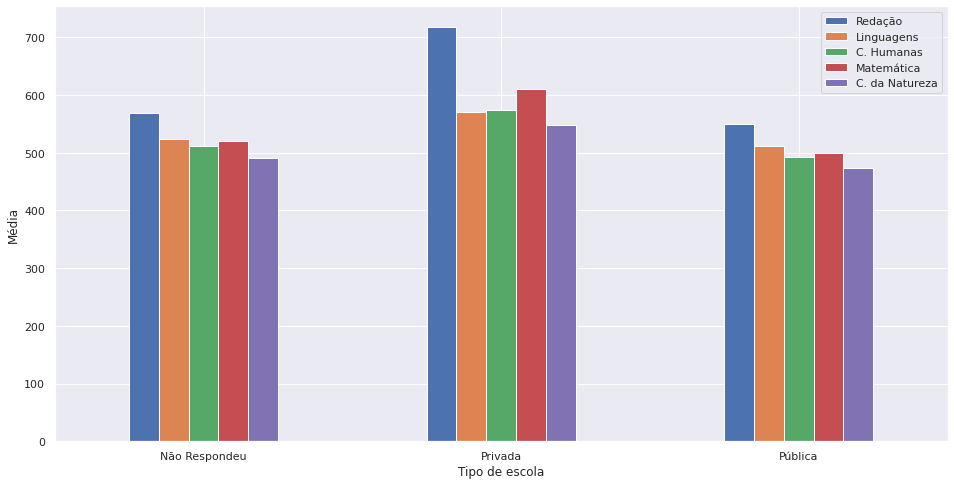

In [ ]:
ax = Medias_Nacional.plot(kind= 'bar', figsize = (16,8))

handles, labels = ax.get_legend_handles_labels()
new_labels = ['Redação', 'Linguagens', 'C. Humanas', 'Matemática', 'C. da Natureza']
ax.legend(new_labels, bbox_to_anchor = (1,1), loc = 0)
ax.set_xlabel('Tipo de escola')
ax.set_ylabel('Média')
plt.xticks(rotation=0);

### **Removendo as linhas com NaN nas colunas das notas:**

In [ ]:
# Entradas NaN nas colunas de notas representam candidatos que não fizeram a prova daquela matéria

NotasEnem_REDACAO = NotasEnem.filter(items = ['SG_UF_PROVA', 'TIPO_ESCOLA', 'NU_NOTA_REDACAO']).dropna(subset = ['NU_NOTA_REDACAO'])

NotasEnem_MT = NotasEnem.filter(items = ['SG_UF_PROVA', 'TIPO_ESCOLA', 'NU_NOTA_MT']).dropna(subset = ['NU_NOTA_MT'])

NotasEnem_CN = NotasEnem.filter(items = ['SG_UF_PROVA', 'TIPO_ESCOLA', 'NU_NOTA_CN']).dropna(subset = ['NU_NOTA_CN'])

NotasEnem_CH = NotasEnem.filter(items = ['SG_UF_PROVA', 'TIPO_ESCOLA', 'NU_NOTA_CH']).dropna(subset = ['NU_NOTA_CH'])

NotasEnem_LC = NotasEnem.filter(items = ['SG_UF_PROVA', 'TIPO_ESCOLA', 'NU_NOTA_LC']).dropna(subset = ['NU_NOTA_LC'])

In [ ]:
NotasEnem_LC

,SG_UF_PROVA,TIPO_ESCOLA,NU_NOTA_LC
1,RN,Não Respondeu,595.3
3,SP,Pública,624.2
5,RS,Não Respondeu,505.4
7,SP,Não Respondeu,562.1
8,PB,Não Respondeu,486.2
...,...,...,...
5783103,SP,Pública,596.4
5783104,CE,Pública,658.3
5783105,MS,Pública,607.2
5783106,SP,Não Respondeu,674.5


### **Agrupando as médias das notas por estado e tipo de escola declarado:**

In [ ]:
MediasEstados_REDACAO = NotasEnem_REDACAO.groupby(['SG_UF_PROVA', 'TIPO_ESCOLA']).mean()

MediasEstados_MT = NotasEnem_MT.groupby(['SG_UF_PROVA', 'TIPO_ESCOLA']).mean()

MediasEstados_CN = NotasEnem_CN.groupby(['SG_UF_PROVA', 'TIPO_ESCOLA']).mean()

MediasEstados_CH = NotasEnem_CH.groupby(['SG_UF_PROVA', 'TIPO_ESCOLA']).mean()

MediasEstados_LC = NotasEnem_LC.groupby(['SG_UF_PROVA', 'TIPO_ESCOLA']).mean()

In [ ]:
MediasEstados_REDACAO.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 81 entries, ('AC', 'Não Respondeu') to ('TO', 'Pública')
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_NOTA_REDACAO  81 non-null     float64
dtypes: float64(1)
memory usage: 1.2+ KB


In [ ]:
MediasEstados_REDACAO.unstack().info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, AC to TO
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (NU_NOTA_REDACAO, Não Respondeu)  27 non-null     float64
 1   (NU_NOTA_REDACAO, Privada)        27 non-null     float64
 2   (NU_NOTA_REDACAO, Pública)        27 non-null     float64
dtypes: float64(3)
memory usage: 864.0+ bytes


### **Médias das notas por estado segundo o tipo de escola declarado:**

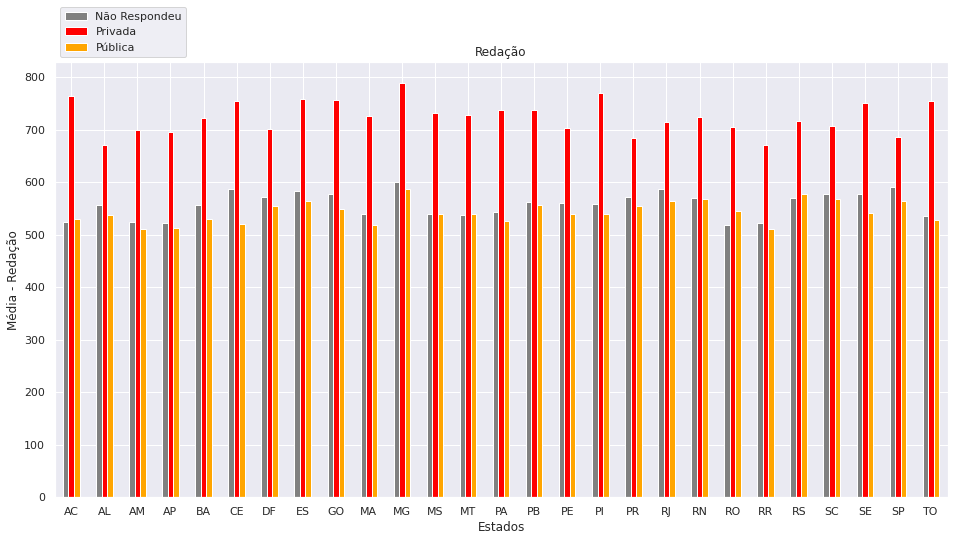

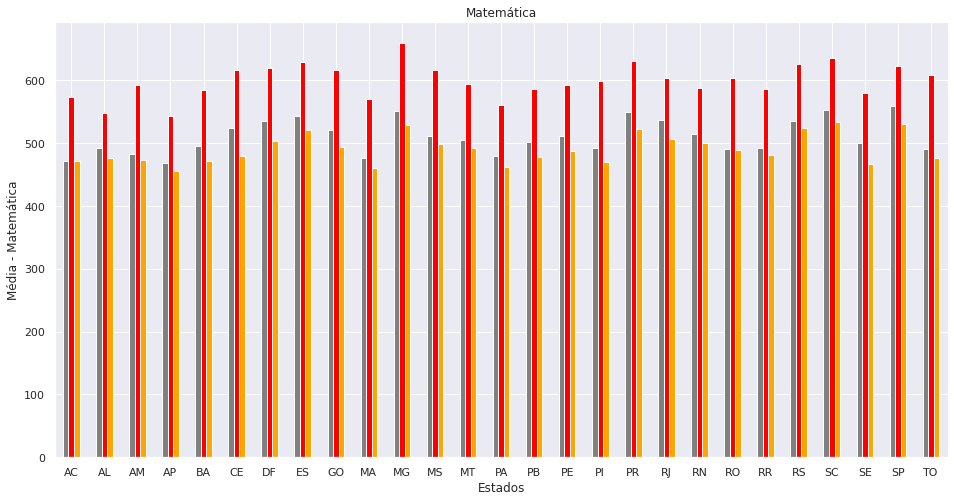

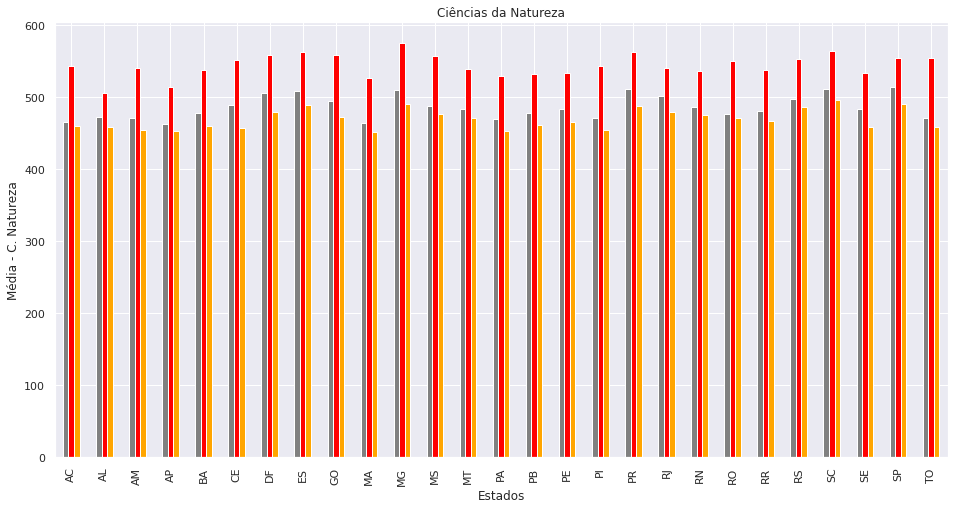

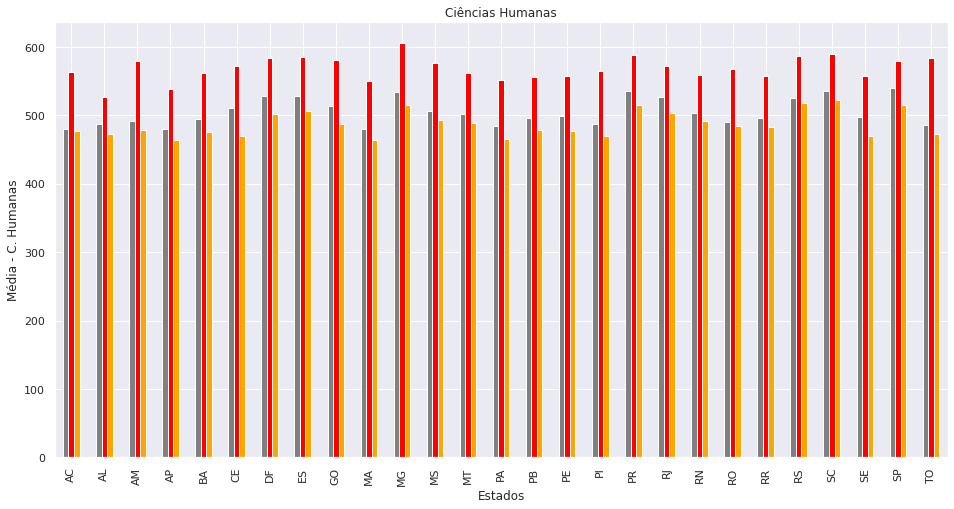

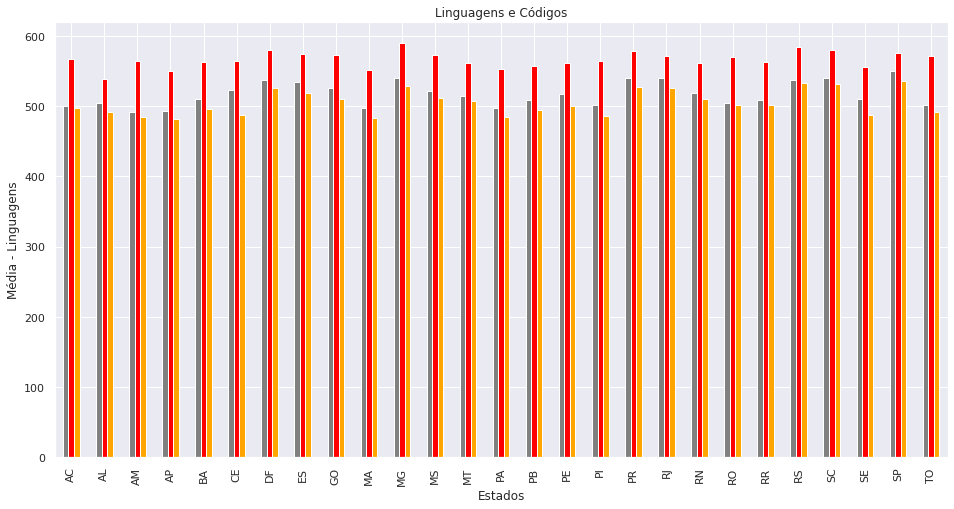

In [ ]:
# Redação

colors = ['grey', 'red', 'orange']

ax_R = MediasEstados_REDACAO.unstack().plot(kind = 'bar', color = colors, figsize = (16,8), title ='Redação');
ax_R.set_xlabel('Estados')
ax_R.set_ylabel('Média - Redação')
plt.xticks(rotation=0)

# Ajustando a legenda usando re 

handles, labels = ax_R.get_legend_handles_labels()
edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
ax_R.legend(edited_labels, bbox_to_anchor = (0,1), loc = 'lower left')

# Matemática 

ax_MT = MediasEstados_MT.unstack().plot(kind = 'bar',figsize = (16,8), title = 'Matemática', color=colors);
ax_MT.set_xlabel('Estados')
ax_MT.set_ylabel('Média - Matemática')
ax_MT.get_legend().remove()
plt.xticks(rotation=0);

# O mesmo pode ser feito com as outras matérias:

# Ciências da Natureza

ax_CN = MediasEstados_CN.unstack().plot(kind = 'bar', color=colors, figsize = (16,8), title = 'Ciências da Natureza');
ax_CN.set_xlabel('Estados')
ax_CN.set_ylabel('Média - C. Natureza')
ax_CN.get_legend().remove()

# Ciências Humanas

ax_CH = MediasEstados_CH.unstack().plot(kind = 'bar', color=colors, figsize = (16,8), title = 'Ciências Humanas');
ax_CH.set_xlabel('Estados')
ax_CH.set_ylabel('Média - C. Humanas')
ax_CH.get_legend().remove()

# Linguagens e Códigos 

ax_LC = MediasEstados_LC.unstack().plot(kind = 'bar', color=colors, figsize = (16,8), title = 'Linguagens e Códigos');
ax_LC.set_xlabel('Estados')
ax_LC.set_ylabel('Média - Linguagens')
ax_LC.get_legend().remove()